[12, 14, 6, 25, 16, 16, 0, 20, 26, 24]


/Users/nmba/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /Users/nmba/anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


No Page Found on WIKIPEDIA
[ 1  2  3  4  5  6  7  8  9 10]
event=  Submit values= {}
Score= 50
x = [1 2 3 4 5 6 7 8 9]
y=  [10, 20, 30, 0, 0, 40, 50, 0, 0]


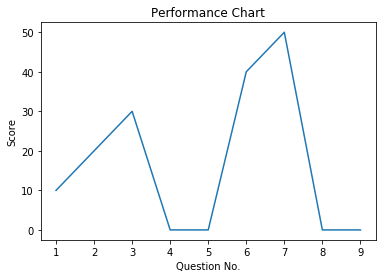

In [6]:
import PySimpleGUI as sg
import pandas as pd
import numpy as np
import wikipedia
import pyttsx3
import matplotlib.pyplot as plt
import sqlite3
import time
import pygame

#from docx import Document
#from docx.shared import Inches
#import sys 
#import requests as r
#import webbrowser as wb
#import bs4 

%matplotlib inline

######################################CONNECTION WITH SQL DATABASE#####################################################
df=pd.read_excel("Quiz_Qestion.xlsx")
#print(df)

conn = sqlite3.connect('Users.db')
c = conn.cursor()

c.execute("""CREATE TABLE IF NOT EXISTS user (
            Username VARCHAR(20) NOT NULL,
            First_Name VARCHAR(20) NOT NULL,
            Last_Name VARCHAR(20) NOT NULL,
            Email VARCHAR(20) NOT NULL,
            Password VARCHAR(20) NOT NULL
            )""")
conn.commit()

"""
########################################CODE FOR SPEAK RESULTS#########################################################  
engine=pyttsx3.init("sapi5")
voices=engine.getProperty("voices")
#print(voices[1].id)
engine.setProperty("voice",voices[0].id)



def speak(audio):
    engine.say(audio)
    engine.runAndWait()


#####################################FUNCTION FOR ADDIND NEW USER######################################################
def new_user():
    with conn:
        insert=('INSERT INTO user VALUES (?,?,?,?,?)')
        c.execute(insert,[values["name"],values["first_name"],values["last_name"],values["email"],values["password"]])
        conn.commit()
        r=c.fetchall()
        if r:
            for i in r:
                print("Welcome"+i[1]+"you have registered")
                window1.Close()
                break
####################################FUNCTION FOR LOGIN USER############################################################
def login():
    with conn:
        find_user=("SELECT * FROM User WHERE Username=? AND Email=? AND Password=?")
        c.execute(find_user,([(name),(email),(password)]))
        results=c.fetchall()
                
        if results:
            for i in results:
                print("Welcome"+i[1])
                break
        else:
            print("Username and password not recognised")
            again=input("Do you want to try again?y/n ")
            if again.lower()=="n":
                print("Goodbye")
                #speak("Goodbye")
                time.sleep(.1)
            elif again.lower()=="y":
                print("Please enter username and password ")
                time.sleep(.1)
            window2.Close()
###################CODE FOR SELECTING REGISTRATION WINDOW OR LOGIN WINDOW#############################################

layout=[
    [sg.Text("Please Select Appropriate Option For Start Quiz",size=(30,7),font="Helvetica 15")],
    [sg.Button("Register_for_Quiz"), sg.Button("Login_in_Quiz")]
]
window= sg.Window('SELECTING_REGISTRATION_WINDOW_OR_LOGIN_WINDOW').Layout(layout)
while True:
    event,values=window.Read()
    print("event= ", event,"values=",values)
    
###########################################CODE FOR REGISTRATION WINDOW################################################
    if(event=="Register_for_Quiz"):
        window.Close()
        layout1=[
                [sg.Text("User Registration",size=(20,3),font="Courier 15")],
                [sg.Text('User Name', size=(15, 1)), sg.InputText('',key="name")],
                [sg.Text('First_Name', size=(15, 1)), sg.InputText('',key="first_name")],
                [sg.Text('Last_Name', size=(15, 1)), sg.InputText('',key="last_name")],
                [sg.Text('Email', size=(15, 1)), sg.InputText('',key="email")],
                [sg.Text('Password', size=(15, 1)), sg.InputText('',key="password")],
                [sg.Button("Submit"), sg.Button("Exit")]
        ]

        window1= sg.Window('Registration_For_Quiz_Application').Layout(layout1)
        #speak("You had click on Register_for_Quiz Button to Register, Now enter User Name,First_Name,Last_Name,Email,Password")

        while True:
            event,values=window1.Read()
            print("event= ", event,"values=",values)
            if(event=="Submit"):
                new_user()        
            elif(event is None or event=="Exit"):
                window1.Close()
                break 
            break    
    ####################################CODE FOR LOGIN WINDOW##############################################################
    elif(event=="Login_in_Quiz"):
        window.Close()
        layout2=[
                [sg.Text("User Login",size=(15,3),font="Courier 15")],
                [sg.Text('User Name', size=(15, 1)), sg.InputText('',key="name1")],
                [sg.Text('Email', size=(15, 1)), sg.InputText('',key="email1")],
                [sg.Text('Password', size=(15, 1)), sg.InputText('',key="password1")],
                [sg.Button("Login"), sg.Button("Exit")]
        ]

        window2= sg.Window('Login_For_Quiz_Application').Layout(layout2)
        #speak("You had click on Login_in_Quiz Button to Login, Now enter User Name,Email,Password")
        while True:
            event2,values2=window2.Read()
            print("event= ", event2,"values=",values2)
            #Start_window.Close()
            name=values2["name1"]
            email=values2["email1"]
            password=values2["password1"]
            if(event2=="Login"):
                login()                
            elif(event is None or event=="Exit"):
                window2.Close()
                break
            break
        break  

"""
########################################CODE FOR TIMER SOUND###########################################################    
def Sound():
    pygame.mixer.init()
    pygame.mixer.music.load("tictiksound.mp3")
    pygame.mixer.music.play()
########################################CODE FOR TIMER SOUND###########################################################
def Alarm():
    pygame.mixer.init()
    pygame.mixer.music.load("LoudAlarm.mp3")
    pygame.mixer.music.play()
#########################################CODE FOR TIMER################################################################    
def time_as_int():
    return int(round(time.time() * 100))
########################################CODE FOR GENERATION OF QUIZ####################################################       
    
list=[]
l1=[]     
list_Y=[]    
Score=0
r=[]
for i in range(10):
    n=np.random.randint(0,30)
    r.append(n)
print(r)
j=0
k=0
amount=10
layout4=[
    [sg.Text(str(df.iloc[r[j],1]),key="Question",size=(80, 2))],
    [sg.Radio("","Radio",key="Radio1"),sg.Text(str(df.iloc[r[j],2]),key="tRadio1",size=(40, 1))],
    [sg.Radio("","Radio",key="Radio2"),sg.Text(str(df.iloc[r[j],3]),key="tRadio2",size=(40, 1))],
    [sg.Radio("","Radio",key="Radio3"),sg.Text(str(df.iloc[r[j],4]),key="tRadio3",size=(40, 1))],
    [sg.Radio("","Radio",key="Radio4"),sg.Text(str(df.iloc[r[j],5]),key="tRadio4",size=(40, 1))],
    [sg.Text("Time Remaining: ")],
    [sg.Text(amount, size=(15, 2),font=('Helvetica', 20), justification='center', key="_timer")],
    [sg.Button("Next"),sg.Button("Lock_Answer"),sg.Button("Quit")]
]
window4= sg.Window('Quiz_Application').Layout(layout4)
while(j<9):
    event, values = window4.Read(timeout=1000) # run every 1 Second
    if amount:
        window4['_timer'].Update('{:02d}'.format(amount))
        amount -= 1
    k+=1
    #sg.PopupAnimated(sg.DEFAULT_BASE64_LOADING_GIF,no_titlebar=False,location=(30,30))
    window4.FindElement('_timer').Update('{:02d}'.format(amount))
    Sound()
    #Alarm()
    l=values
    
    if(event is None or event=="Quit"):
        #sg.PopupAnimated(image_source=None)
        list_Y.append(0)
        break
        
    elif(event=="__TIMEOUT__"):
        if(k==9):
            window4.FindElement('_timer').Update('Times up')
            amount=10
            list_Y.append(0)
            #sg.PopupAnimated(image_source=None)
            j+=1
            window4.FindElement('Question').Update(str(df.iloc[r[j],1]))
            window4.FindElement('tRadio1').Update(str(df.iloc[r[j],2]))
            window4.FindElement('tRadio2').Update(str(df.iloc[r[j],3]))
            window4.FindElement('tRadio3').Update(str(df.iloc[r[j],4]))
            window4.FindElement('tRadio4').Update(str(df.iloc[r[j],5]))
            k=0
        
        
    elif(event=="Lock_Answer"):
        amount=10
        #sg.PopupAnimated(image_source=None)
        if(l["Radio1"]==True):
            l1.append([df.iloc[r[j],1],df.iloc[r[j],2],df.iloc[r[j],6]])
            list.append(l1)
            l1=[]
            if(df.iloc[r[j],2]==df.iloc[r[j],6]):
                #print("Your Answer is correct")
                sg.PopupTimed("Correct Answer",auto_close=True,
                              auto_close_duration=1,non_blocking=True,
                              no_titlebar=False,keep_on_top=True)
                Score+=10
                list_Y.append(Score)
                #window4.Close()
            else:

                sg.PopupTimed("Wrong Answer",auto_close=True,
                              auto_close_duration=1,non_blocking=True,
                              no_titlebar=False,keep_on_top=True)
                list_Y.append(0)

        elif(l["Radio2"]==True):
            l1.append([df.iloc[r[j],1],df.iloc[r[j],3],df.iloc[r[j],6]])
            list.append(l1)
            l1=[]
            if(df.iloc[r[j],3]==df.iloc[r[j],6]):
                sg.PopupTimed("Correct Answer",auto_close=True,
                              auto_close_duration=1,non_blocking=True,
                              no_titlebar=False,keep_on_top=True)
                
                Score+=10
                list_Y.append(Score)
            else:
                sg.PopupTimed("Wrong Answer",auto_close=True,
                              auto_close_duration=1,non_blocking=True,
                              no_titlebar=False,keep_on_top=True)
                list_Y.append(0)

        elif(l["Radio3"]==True):
            l1.append([df.iloc[r[j],1],df.iloc[r[j],4],df.iloc[r[j],6]])
            list.append(l1)
            l1=[]
            if(df.iloc[r[j],4]==df.iloc[r[j],6]):
                sg.PopupTimed("Correct Answer",auto_close=True,
                              auto_close_duration=1,non_blocking=True,
                              no_titlebar=False,keep_on_top=True)
                Score+=10
                list_Y.append(Score)
            else:
                sg.PopupTimed("Wrong Answer",auto_close=True,
                              auto_close_duration=1,non_blocking=True,
                              no_titlebar=False,keep_on_top=True)
                list_Y.append(0)

        elif(l["Radio4"]==True):
            l1.append([df.iloc[r[j],1],df.iloc[r[j],5],df.iloc[r[j],6]])
            list.append(l1)
            l1=[]
            if(df.iloc[r[j],5]==df.iloc[r[j],6]):
                sg.PopupTimed("Correct Answer",auto_close=True,
                              auto_close_duration=1,non_blocking=True,
                              no_titlebar=False,keep_on_top=True)
                Score+=10
                list_Y.append(Score)
            else:
                sg.PopupTimed("Wrong Answer",auto_close=True,
                              auto_close_duration=1,non_blocking=True,
                              no_titlebar=False,keep_on_top=True)
                list_Y.append(0)
        else:
            #print("Your Answer is Wrong")
            '''
            sg.PopupTimed("Correct Answer",auto_close=True,
                              auto_close_duration=3,non_blocking=True,
                              no_titlebar=False,keep_on_top=True)
            print(str(df.iloc[r[j],6]))
            '''
        try:
            summary2=wikipedia.summary(str(df.iloc[r[j],6]),sentences=5)
            '''
            sg.PopupTimed("Correct Answer is: {}".format(summary2),auto_close=True,
                              auto_close_duration=3,non_blocking=True,
                              no_titlebar=False,keep_on_top=True)
            '''
            #speak(summary2)
        except:
            print("No Page Found on WIKIPEDIA")
            #speak("No Page Found on WIKIPEDIA")
            #summary=wikipedia.summary(str(df.iloc[r,1]),sentences=5)
            #print(str(df.iloc[r,1]))
            #print(summary)
            #speak(summary)
        j+=1
        #event, values = window4.Read(10)
        window4.FindElement('Question').Update(str(df.iloc[r[j],1]))
        window4.FindElement('tRadio1').Update(str(df.iloc[r[j],2]))
        window4.FindElement('tRadio2').Update(str(df.iloc[r[j],3]))
        window4.FindElement('tRadio3').Update(str(df.iloc[r[j],4]))
        window4.FindElement('tRadio4').Update(str(df.iloc[r[j],5]))
        k=0

    elif(event=="Next"):
        amount=10
        list_Y.append(0)
        #sg.PopupAnimated(image_source=None)
        j+=1
        #event, values = window4.Read(10)
        window4.FindElement('Question').Update(str(df.iloc[r[j],1]))
        window4.FindElement('tRadio1').Update(str(df.iloc[r[j],2]))
        window4.FindElement('tRadio2').Update(str(df.iloc[r[j],3]))
        window4.FindElement('tRadio3').Update(str(df.iloc[r[j],4]))
        window4.FindElement('tRadio4').Update(str(df.iloc[r[j],5]))
        k=0
        continue
window4.Close()
        
#########################################CODE FOR SUBMIT WINDOW########################################################
x=np.arange(1,11,1)
print(x)
layout5=[
    [sg.Button("Submit")]
]
window5 = sg.Window('Quiz_Application_Submit').Layout(layout5)
event,values=window5.Read()
print("event= ", event,"values=",values)
if(event=="Submit"):
    print("Score=",Score)
    x=np.arange(1,10,1)
    print("x =",x)
    y=list_Y
    print("y= ",y)
    plt.title("Performance Chart")
    plt.xlabel("Question No.")
    plt.ylabel("Score")
    plt.savefig("Figure.png")
    plt.plot(x,y)
    plt.show()
    
window5.Close()        
